# Lession 1

## Loading essential Libraries

Loading the intital libraries 

In [20]:
#answer, write code which is a solution for above question.
get_ipython().magic('matplotlib notebook')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import csv
import io
import urllib.request
#import requests
#require(RCurl)
import sys

Hint : Load the 'requests' library

In [21]:
import requests

In [22]:
try:
    modulename='requests'
    def verify_answer():
        
        if modulename in sys.modules: 
            return True
        else:
            return False
       
    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')  

continue


In [23]:
url="https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/women-stem.csv"
c=pd.read_csv(url,error_bad_lines=False,index_col=0)
m=c.shape
m[0]

76

## Lesson 2

###  Exploratory data analysis/VIsulization

<IPython.core.display.Javascript object>


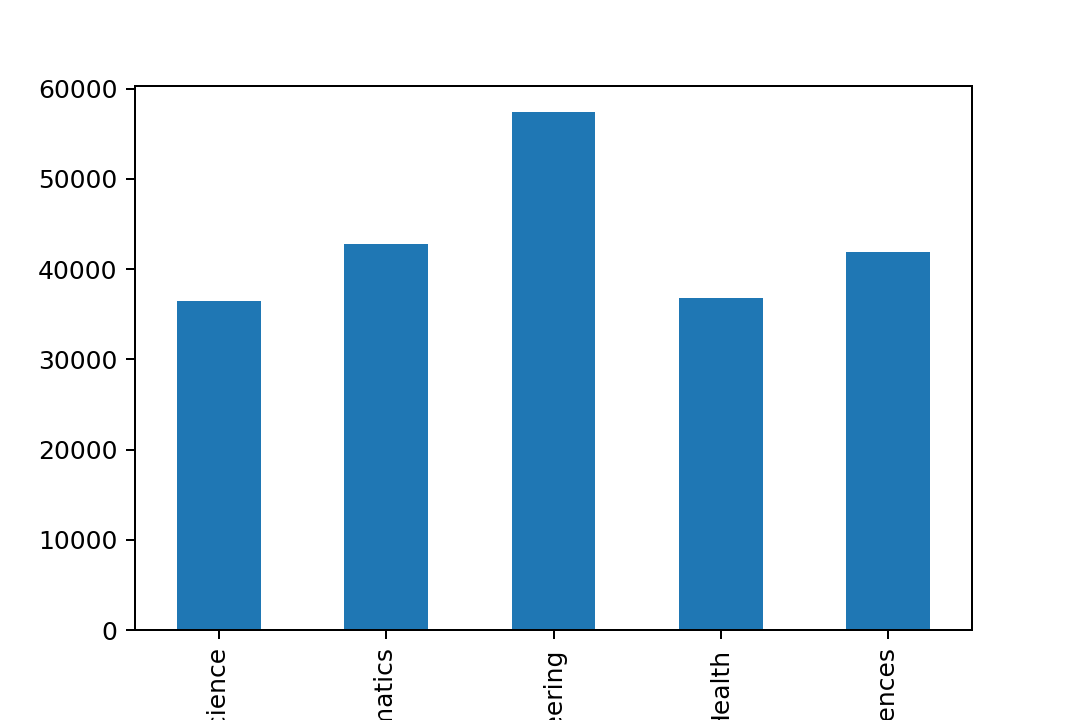

Major_category
Biology & Life Science     36421.428571
Computers & Mathematics    42745.454545
Engineering                57382.758621
Health                     36825.000000
Physical Sciences          41890.000000
Name: Median, dtype: float64

In [24]:


c.head()
c.describe(include=['O'])
c['ShareWomen'].mean()
Mean_Values=c.groupby('Major_category')[['Total','Men','Women','ShareWomen','Median']].mean()
Mean_Values['Median'].plot.bar()
Mean_Values['Women'].plot.bar()
Mean_Values_dummy=c.groupby('Major_category')['Median'].mean()
Mean_Values_dummy

Hint: 

In [25]:
#Code your....

In [26]:
#VALIDATION CODE

## Lesson 3

###  data Cleaning and Feature Selection

Checked correlation and removed highly correlated variables to avoid the colienarlity
Creatred dummy variables from catagorical variables

In [27]:
c_copy=c.copy()
dummy = pd.get_dummies(c_copy['Major_category'])
c_copy = c_copy.merge(dummy, left_index=True, right_index=True)
c_copy = c_copy.drop('Major_code',1)
c_copy = c_copy.drop('Major',1)
c_copy = c_copy.drop('Major_category',1)
c_copy.head()
c_copy.corr(method='pearson')
c_copy = c_copy.drop('Total',1)

Hint: 

In [28]:
#### your code

In [29]:
### Validation Code

## Lesson 3

###  Creating Training and Testing Datasets

Spliting the training/testing dataset in 80:20 ratio
created x and y variables list 

In [30]:
#Split data to training and test sets
MSE_Train,MSE_Test = train_test_split(c_copy, train_size=.8,test_size = .2, random_state = 12345)
MSE_Train_x=MSE_Train[['Men','Women','Median','Biology & Life Science','Computers & Mathematics','Engineering','Health','Physical Sciences']]
MSE_Train_y=MSE_Train['ShareWomen']
MSE_Test_x=MSE_Test[['Men','Women','Median','Biology & Life Science','Computers & Mathematics','Engineering','Health','Physical Sciences']]
MSE_Test_y=MSE_Test['ShareWomen']

Hint:


In [31]:
#Your code

In [32]:
#Validation Score

## Lesson 4

###  Linear Regression

Run the linear regression and calculated MSE on training and testing datasets
Found the R2 values for model

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
MSE_Train_x_scaled = pd.DataFrame(scaler.fit_transform(MSE_Train_x))
MSE_Test_x_scaled = pd.DataFrame(scaler.fit_transform(MSE_Test_x))
MSE_Test_x_scaled

#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


stem_model = LinearRegression().fit(MSE_Train_x_scaled, MSE_Train_y)
print('linear model coeff (w): {}'
     .format(stem_model.coef_))
print('linear model intercept (b): {:.3f}'
     .format(stem_model.intercept_))
print('R-squared score (training): {:.3f}'
     .format(stem_model.score(MSE_Train_x_scaled, MSE_Train_y)))
print('R-squared score (test): {:.3f}'
     .format(stem_model.score(MSE_Test_x_scaled, MSE_Test_y)))


MSE_Train=mean_squared_error(list(MSE_Train_y),list(stem_model.predict(MSE_Train_x_scaled)))
print('\nMean Squared Error (train)')
print(MSE_Train)
MSE_Test=mean_squared_error(list(MSE_Test_y),list(stem_model.predict(MSE_Test_x_scaled)))
print('\nMean Squared Error (test)')
print(MSE_Test)




linear model coeff (w): [-0.1868675   0.28557568 -0.13853416  0.0851401  -0.14611843 -0.19457039
  0.27738193 -0.02183321]
linear model intercept (b): 0.513
R-squared score (training): 0.822
R-squared score (test): 0.777

Mean Squared Error (train)
0.00833503278624

Mean Squared Error (test)
0.0164524740175


Hint

In [34]:
#Your Code

In [35]:
#Validatiioin Code

## Lesson 5

### Polynomical Regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
MSE_Train_x_scaled_poly = poly.fit_transform(MSE_Train_x_scaled)
MSE_Test_x_scaled_poly = poly.fit_transform(MSE_Test_x_scaled)
stem_model = LinearRegression().fit(MSE_Train_x_scaled_poly, MSE_Train_y)
print('linear model coeff (w): {}'
     .format(stem_model.coef_))
print('linear model intercept (b): {:.3f}'
     .format(stem_model.intercept_))
print('R-squared score (training): {:.3f}'
     .format(stem_model.score(MSE_Train_x_scaled_poly, MSE_Train_y)))
print('R-squared score (test): {:.3f}'
     .format(stem_model.score(MSE_Test_x_scaled_poly, MSE_Test_y)))


MSE_Train=mean_squared_error(list(MSE_Train_y),list(stem_model.predict(MSE_Train_x_scaled_poly)))
print('\nMean Squared Error (train)')
print(MSE_Train)
MSE_Test=mean_squared_error(list(MSE_Test_y),list(stem_model.predict(MSE_Test_x_scaled_poly)))
print('\nMean Squared Error (test)')
print(MSE_Test)

linear model coeff (w): [  8.63852473e+12  -1.87917552e+00   1.69454673e+00  -1.63656932e-02
   9.87019422e-02  -1.24077498e-01  -1.17173344e-01   1.89765852e-01
  -4.72169524e-02   1.63778389e+00  -8.53749449e+00  -2.34438075e+00
  -5.23976796e+00   1.21511543e+00   1.25655963e+00   1.15949427e+00
  -2.70576891e-01   8.47194802e+00   1.11954263e+01   3.04288228e+00
  -2.79529211e-01   1.36079095e+00  -2.56196836e+00   1.32371080e-01
  -1.73846223e-01  -2.17464810e-01   5.32633829e-01   9.48482026e-02
  -1.15671702e+00   7.30334102e-01   9.87019422e-02   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -1.24077498e-01
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -1.17173344e-01
   0.00000000e+00   0.00000000e+00   1.89765852e-01   0.00000000e+00
  -4.72169524e-02]
linear model intercept (b): -8638524726388.870
R-squared score (training): 0.885
R-squared score (test): -34.195

Mean Squared Error (train)
0.00538321242762

Mean Squared Error (test)
2.59357838434

Hint: 

In [37]:
# Your Code